<a href="https://colab.research.google.com/github/PuliVilash/LetsUpgradeAWS/blob/master/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 50kB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 3.8MB 38.2MB/s 
     |████████████████████████████████| 450kB 35.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=938d8edc486e7158e489f23f3f4c324ce8b03627ab8fc036143116e1dace13f3
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tenso

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv("diabetes.csv")

In [4]:
dataset.head()
dataset.shape

(768, 9)

In [5]:
features = dataset.drop(["Outcome"], axis=1)
X = np.array(features)
y = np.array(dataset["Outcome"])

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.20)

In [7]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
tree.tree_.max_depth

15

In [10]:
validation_prediction = tree.predict(X_val)
training_prediction = tree.predict(X_train)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
print('Accuracy training set: ', accuracy_score(y_true=y_train, y_pred=training_prediction))
print('Accuracy validation set: ', accuracy_score(y_true=y_val, y_pred=validation_prediction))

Accuracy training set:  1.0
Accuracy validation set:  0.7987012987012987


In [15]:
!pip install graphviz

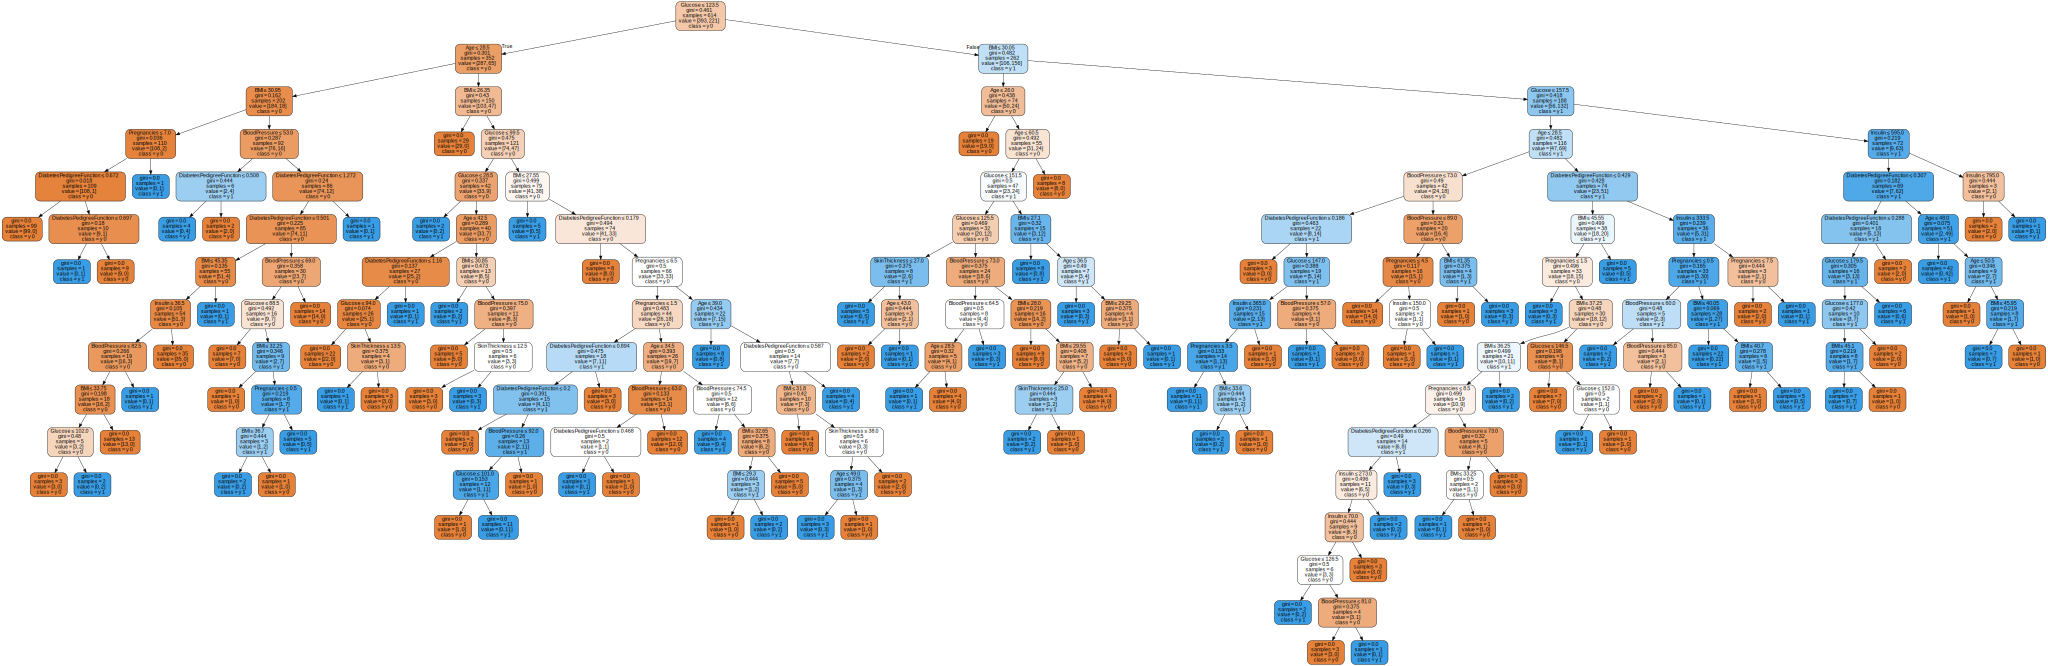

In [16]:
import graphviz 
from sklearn.tree import export_graphviz

feature_names = features.columns

dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=feature_names,  
                         class_names=True,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)

graph